<a href="https://colab.research.google.com/github/rtchandel01/12-july/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
from google.colab import files
uploaded = files.upload()

Saving sales_data.csv to sales_data.csv


In [3]:
df = pd.read_csv('sales_data.csv')

In [4]:
df

,Unnamed: 0,ProductID,QuantitySold,Price,Discount,Category,Supplier,Date,CustomerID,Country,Profit
0,0,C,8,75.539471,0.064576,Toys,Supplier1,2022-01-01,1148,USA,20.835021
1,1,A,8,43.100482,0.142251,Toys,Supplier3,2022-01-02,1079,USA,11.003640
2,2,C,3,66.907525,0.198508,Clothing,Supplier2,2022-01-03,1885,Canada,6.896583
3,3,C,1,67.017674,0.071013,Home,Supplier3,2022-01-04,1212,USA,8.221993
4,4,A,8,58.219722,0.127749,Toys,Supplier3,2022-01-05,1202,UK,8.201146
...,...,...,...,...,...,...,...,...,...,...,...
95,95,A,7,25.254347,0.060585,Toys,Supplier2,2022-04-06,1216,Canada,26.637678
96,96,A,4,60.112114,0.146363,Toys,Supplier1,2022-04-07,1853,USA,25.426802
97,97,C,7,94.253930,0.053977,Electronics,Supplier1,2022-04-08,1826,Canada,11.447571
98,98,A,8,72.642682,0.137866,Electronics,Supplier1,2022-04-09,1794,USA,9.272190


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
features = ['QuantitySold', 'Price', 'Discount', 'Profit']# for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features]) #standardize the feature

In [11]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)  # distance_threshold=None for automatic determination
df['Cluster'] = model.fit_predict(df_scaled) #perform hierarchical clustering

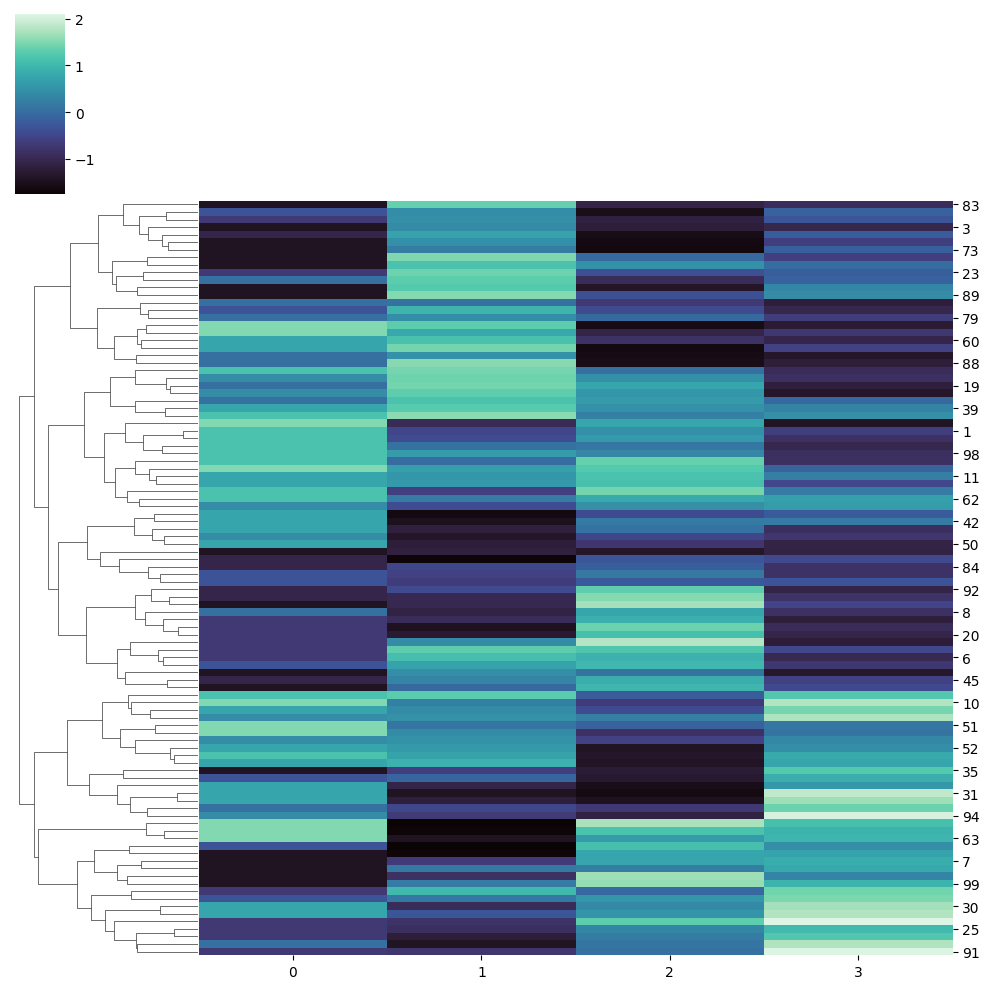

In [12]:
sns.clustermap(df_scaled, method='average', cmap="mako", col_cluster=False)
plt.show()


In [13]:
df[['CustomerID', 'Cluster']]

,CustomerID,Cluster
0,1148,95
1,1079,99
2,1885,67
3,1212,63
4,1202,83
...,...,...
95,1216,6
96,1853,3
97,1826,2
98,1794,1


from matplotlib import pyplot as plt
_df_0['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='CustomerID', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
segment_stats = df.groupby('Cluster').agg({
    'QuantitySold': 'mean',
    'Profit': 'sum'
}).reset_index() #average purchase quantity and total spending for each segment
print(segment_stats)


    Cluster  QuantitySold     Profit
0         0           1.0  21.716080
1         1           8.0   9.272190
2         2           7.0  11.447571
3         3           4.0  25.426802
4         4           6.0   9.334340
..      ...           ...        ...
95       95           8.0  20.835021
96       96           8.0   9.425262
97       97           7.0  28.021810
98       98           3.0   8.797567
99       99           8.0  11.003640

[100 rows x 3 columns]


In [17]:
features = ['QuantitySold', 'Price', 'Discount', 'Profit', 'Category']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features[:-1]])  # Exclude 'Category' from scaling
preferred_categories = df.groupby('Cluster')['Category'].agg(lambda x: x.value_counts().idxmax()).reset_index()
print(preferred_categories)


    Cluster     Category
0         0         Home
1         1  Electronics
2         2  Electronics
3         3         Toys
4         4     Clothing
..      ...          ...
95       95         Toys
96       96         Toys
97       97     Clothing
98       98  Electronics
99       99         Toys

[100 rows x 2 columns]
